# ***Set Parameter Network :***

In [1]:
total_data = 12000

n_c = 4

i_s = (150, 150, 3)

b_s = 32

l_r = 0.0003

reg = 0.0002

epoch = 100

# ***Import Library :***

In [2]:
%matplotlib inline

import os
import math
import keras
import random
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

from os import *
from tqdm import tqdm
from glob import glob
from pathlib import Path

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import *
from tensorflow.keras import regularizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import Xception
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.applications.densenet import preprocess_input

from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Convolution2D, Input
from tensorflow.keras.layers import Flatten, MaxPooling2D, Dropout, BatchNormalization

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array

from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")
print("Tensorflow-version:", tf.__version__)

Tensorflow-version: 2.4.1


# ***Show Sample Function :***

In [3]:
def rand(start, end):
    rand = round(random.uniform(start, end), 1)
    return rand

In [4]:
def plot_images(X_data, Y_data):

    class_name = ['Covid-19', 'Normal', 'BacterialPneumonia', 'ViralPneumonia']
    samples_pre_class = n_c
    
    plt.figure(figsize=(16, 16))
    
    for cls, name in enumerate (class_name):
        idxs = np.flatnonzero(Y_data == cls)
        idxs = np.random.choice(idxs, samples_pre_class, replace = False)
        
        for i, idx in enumerate (idxs):
            plt.subplot(samples_pre_class, n_c, i*4+cls+1)
            plt.imshow(X_data[idx], interpolation= 'spline16')
            plt.axis('off')
            if i == 0:
                plt.title(class_name[cls])

In [5]:
def plot__images(images, title):
    nrows, ncols = 4, 4
    figsize = [16, 16]

    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize, facecolor=(1, 1, 1))

    for i, axi in enumerate(ax.flat):
        axi.imshow(images[i])
        axi.set_axis_off()

    plt.suptitle(title, fontsize=24)
    plt.tight_layout(pad=0.2, rect=[0, 0, 1, 0.9])
    plt.show()

# ***Load Train Dataset :***

In [6]:
img= 0
img_ary= []
covid_train_labels= []
path= Path ('C:/Dataset/Train/Covid-19').expanduser()

for fname in listdir (path):
    fpath= os.path.join (path, fname)
    img= image.load_img (fpath, target_size= (150, 150),color_mode= 'rgb')
    img_ary.append (np.array (image.img_to_array (img)))

covid_train_images= np.array (img_ary) / 255.0

for i in img_ary:
  covid_train_labels.append (0)

print(covid_train_images.shape)
print('\n', covid_train_labels[0], len(covid_train_labels))

(2100, 150, 150, 3)

 0 2100


In [7]:
img= 0
img_ary= []
normal_train_labels= []
path= Path ('C:/Dataset/Train/Normal').expanduser()

for fname in listdir (path):
    fpath= os.path.join (path, fname)
    img= image.load_img (fpath, target_size= (150, 150),color_mode= 'rgb')
    img_ary.append (np.array (image.img_to_array (img)))

normal_train_images= np.array (img_ary) / 255.0

for i in img_ary:
  normal_train_labels.append (1)

print(normal_train_images.shape)
print('\n', normal_train_labels[0], len(normal_train_labels))

(2100, 150, 150, 3)

 1 2100


In [8]:
img= 0
img_ary= []
bacterialpneumonia_train_labels= []
path= Path ('C:/Dataset/Train/Bacterial Pneumonia').expanduser()

for fname in listdir (path):
    fpath= os.path.join (path, fname)
    img= image.load_img (fpath, target_size= (150, 150),color_mode= 'rgb')
    img_ary.append (np.array (image.img_to_array (img)))

bacterialpneumonia_train_images= np.array (img_ary) / 255.0

for i in img_ary:
  bacterialpneumonia_train_labels.append (2)

print(bacterialpneumonia_train_images.shape)
print('\n', bacterialpneumonia_train_labels[0], len(bacterialpneumonia_train_labels))

(2100, 150, 150, 3)

 2 2100


In [9]:
img= 0
img_ary= []
viralpneumonia_train_labels= []
path= Path ('C:/Dataset/Train/Viral Pneumonia').expanduser()

for fname in listdir (path):
    fpath= os.path.join (path, fname)
    img= image.load_img (fpath, target_size= (150, 150),color_mode= 'rgb')
    img_ary.append (np.array (image.img_to_array (img)))

viralpneumonia_train_images= np.array (img_ary) / 255.0

for i in img_ary:
  viralpneumonia_train_labels.append (3)

print(viralpneumonia_train_images.shape)
print('\n', viralpneumonia_train_labels[0], len(viralpneumonia_train_labels))

(2100, 150, 150, 3)

 3 2100


In [10]:
covid_train_images.shape, normal_train_images.shape, bacterialpneumonia_train_images.shape, viralpneumonia_train_images.shape

((2100, 150, 150, 3),
 (2100, 150, 150, 3),
 (2100, 150, 150, 3),
 (2100, 150, 150, 3))

# ***Load Valid Dataset :***

In [11]:
img= 0
img_ary= []
covid_valid_labels= []
path= Path ('C:/Dataset/Valid/Covid-19').expanduser()

for fname in listdir (path):
    fpath= os.path.join (path, fname)
    img= image.load_img (fpath, target_size= (150, 150),color_mode= 'rgb')
    img_ary.append (np.array (image.img_to_array (img)))

covid_valid_images= np.array (img_ary) / 255.0

for i in img_ary:
  covid_valid_labels.append (0)

print(covid_valid_images.shape)
print('\n', covid_valid_labels[0], len(covid_valid_labels))

(450, 150, 150, 3)

 0 450


In [12]:
img= 0
img_ary= []
normal_valid_labels= []
path= Path ('C:/Dataset/Valid/Normal').expanduser()

for fname in listdir (path):
    fpath= os.path.join (path, fname)
    img= image.load_img (fpath, target_size= (150, 150),color_mode= 'rgb')
    img_ary.append (np.array (image.img_to_array (img)))

normal_valid_images= np.array (img_ary) / 255.0

for i in img_ary:
  normal_valid_labels.append (1)

print(normal_valid_images.shape)
print('\n', normal_valid_labels[0], len(normal_valid_labels))

(450, 150, 150, 3)

 1 450


In [13]:
img= 0
img_ary= []
bacterialpneumonia_valid_labels= []
path= Path ('C:/Dataset/Valid/Bacterial Pneumonia').expanduser()

for fname in listdir (path):
    fpath= os.path.join (path, fname)
    img= image.load_img (fpath, target_size= (150, 150),color_mode= 'rgb')
    img_ary.append (np.array (image.img_to_array (img)))

bacterialpneumonia_valid_images= np.array (img_ary) / 255.0

for i in img_ary:
  bacterialpneumonia_valid_labels.append (2)

print(bacterialpneumonia_valid_images.shape)
print('\n', bacterialpneumonia_valid_labels[0], len(bacterialpneumonia_valid_labels))

(450, 150, 150, 3)

 2 450


In [14]:
img= 0
img_ary= []
viralpneumonia_valid_labels= []
path= Path ('C:/Dataset/Valid/Viral Pneumonia').expanduser()

for fname in listdir (path):
    fpath= os.path.join (path, fname)
    img= image.load_img (fpath, target_size= (150, 150),color_mode= 'rgb')
    img_ary.append (np.array (image.img_to_array (img)))

viralpneumonia_valid_images= np.array (img_ary) / 255.0

for i in img_ary:
  viralpneumonia_valid_labels.append (3)

print(viralpneumonia_valid_images.shape)
print('\n', viralpneumonia_valid_labels[0], len(viralpneumonia_valid_labels))

(450, 150, 150, 3)

 3 450


In [15]:
covid_valid_images.shape, normal_valid_images.shape, bacterialpneumonia_valid_images.shape, viralpneumonia_valid_images.shape

((450, 150, 150, 3),
 (450, 150, 150, 3),
 (450, 150, 150, 3),
 (450, 150, 150, 3))

# ***Load Test Dataset :***

In [16]:
img= 0
img_ary= []
covid_test_labels= []
path= Path ('C:/Dataset/Test/Covid-19').expanduser()

for fname in listdir (path):
    fpath= os.path.join (path, fname)
    img= image.load_img (fpath, target_size= (150, 150),color_mode= 'rgb')
    img_ary.append (np.array (image.img_to_array (img)))

covid_test_images= np.array (img_ary) / 255.0

for i in img_ary:
  covid_test_labels.append (0)

print(covid_test_images.shape)
print('\n', covid_test_labels[0], len(covid_test_labels))

(450, 150, 150, 3)

 0 450


In [17]:
img= 0
img_ary= []
normal_test_labels= []
path= Path ('C:/Dataset/Test/Normal').expanduser()

for fname in listdir (path):
    fpath= os.path.join (path, fname)
    img= image.load_img (fpath, target_size= (150, 150),color_mode= 'rgb')
    img_ary.append (np.array (image.img_to_array (img)))

normal_test_images= np.array (img_ary) / 255.0

for i in img_ary:
  normal_test_labels.append (1)

print(normal_test_images.shape)
print('\n', normal_test_labels[0], len(normal_test_labels))

(450, 150, 150, 3)

 1 450


In [18]:
img= 0
img_ary= []
bacterialpneumonia_test_labels= []
path= Path ('C:/Dataset/Test/Bacterial Pneumonia').expanduser()

for fname in listdir (path):
    fpath= os.path.join (path, fname)
    img= image.load_img (fpath, target_size= (150, 150),color_mode= 'rgb')
    img_ary.append (np.array (image.img_to_array (img)))

bacterialpneumonia_test_images= np.array (img_ary) / 255.0

for i in img_ary:
  bacterialpneumonia_test_labels.append (2)

print(bacterialpneumonia_test_images.shape)
print('\n', bacterialpneumonia_test_labels[0], len(bacterialpneumonia_test_labels))

(450, 150, 150, 3)

 2 450


In [19]:
img= 0
img_ary= []
viralpneumonia_test_labels= []
path= Path ('C:/Dataset/Test/Viral Pneumonia').expanduser()

for fname in listdir (path):
    fpath= os.path.join (path, fname)
    img= image.load_img (fpath, target_size= (150, 150),color_mode= 'rgb')
    img_ary.append (np.array (image.img_to_array (img)))

viralpneumonia_test_images= np.array (img_ary) / 255.0

for i in img_ary:
  viralpneumonia_test_labels.append (3)

print(viralpneumonia_test_images.shape)
print('\n', viralpneumonia_test_labels[0], len(viralpneumonia_test_labels))

(450, 150, 150, 3)

 3 450


In [20]:
covid_test_images.shape, normal_test_images.shape, bacterialpneumonia_test_images.shape, viralpneumonia_test_images.shape

((450, 150, 150, 3),
 (450, 150, 150, 3),
 (450, 150, 150, 3),
 (450, 150, 150, 3))

# ***Data Visulisation :***

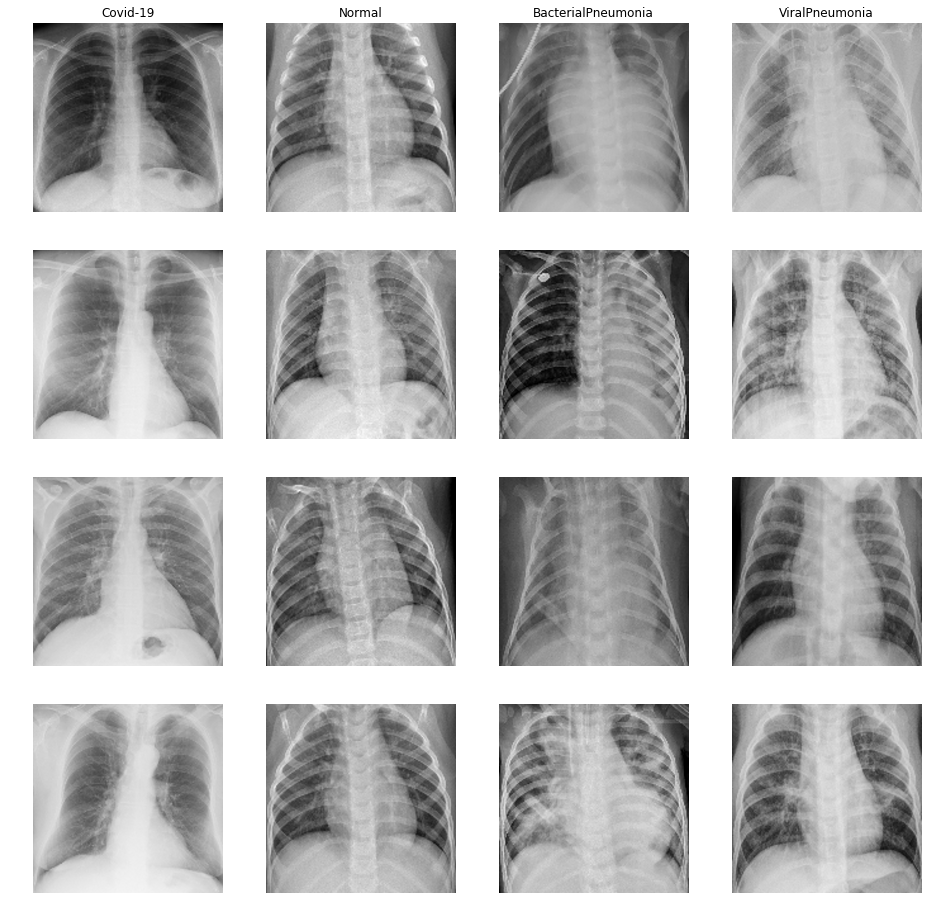

In [21]:
c_l= np.zeros(len (covid_train_images))
n_l= np.ones (len (normal_train_images))
b_l= np.full (len (bacterialpneumonia_train_images), 2, dtype= int)
v_l= np.full (len (viralpneumonia_train_images), 3, dtype= int)

X_data= np.concatenate ((covid_train_images, normal_train_images, bacterialpneumonia_train_images, viralpneumonia_train_images), axis=0)
Y_data= np.concatenate ((c_l, n_l, b_l, v_l), axis=0)

plot_images(X_data, Y_data)

# ***Prepare Data :***

In [22]:
X_train = np.concatenate ((covid_train_images, normal_train_images, bacterialpneumonia_train_images, viralpneumonia_train_images), axis=0)

Y_train = np.concatenate ((covid_train_labels, normal_train_labels, bacterialpneumonia_train_labels, viralpneumonia_train_labels), axis=0)

In [23]:
X_valid = np.concatenate ((covid_valid_images, normal_valid_images, bacterialpneumonia_valid_images, viralpneumonia_valid_images), axis=0)

Y_valid = np.concatenate ((covid_valid_labels, normal_valid_labels, bacterialpneumonia_valid_labels, viralpneumonia_valid_labels), axis=0)

In [24]:
X_test = np.concatenate ((covid_test_images, normal_test_images, bacterialpneumonia_test_images, viralpneumonia_test_images), axis=0)

Y_test = np.concatenate ((covid_test_labels, normal_test_labels, bacterialpneumonia_test_labels, viralpneumonia_test_labels), axis=0)

# ***Categorical Lable Dataset :***

In [25]:
Y_train = to_categorical (
                          Y_train, num_classes = n_c
                         )

Y_valid = to_categorical (
                          Y_valid, num_classes = n_c
                         )

Y_test = to_categorical (
                         Y_test, num_classes = n_c
                        )

In [26]:
train_datagen = ImageDataGenerator()

valid_datagen = ImageDataGenerator()

# ***Detail Dataset :***

In [27]:
print('Number Total data : ' ,total_data)

print('\nNumber Train data : ' ,len(X_train))

print('\nNumber Valid data : ' ,len(X_valid))

print('\nNumber Test data  : ' ,len(X_test))

Number Total data :  12000

Number Train data :  8400

Number Valid data :  1800

Number Test data  :  1800


# ***Model :***

In [28]:
Model_X = Xception (
                    weights ='imagenet',
                    include_top = False, 
                    input_shape = i_s
                   ) 

out = Model_X.output

out = GlobalAveragePooling2D()(out)
out = BatchNormalization()(out)
out = Dropout(0.5)(out)

out = Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(reg))(out) 
out = BatchNormalization()(out)
out = Dropout(0.5)(out)

out = Dense(512, activation='relu', kernel_regularizer=regularizers.l2(reg))(out) 
out = BatchNormalization()(out)
out = Dropout(0.5)(out)

out = Dense(256, activation='relu', kernel_regularizer=regularizers.l2(reg))(out) 
out = BatchNormalization()(out)
out = Dropout(0.5)(out)

out = Dense(n_c, activation = 'softmax')(out)

In [29]:
model = Model (inputs = Model_X.input, outputs = out)

for layer in Model_X.layers:
    layer.trainable = True

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 74, 74, 32)   128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 74, 74, 32)   0           block1_conv1_bn[0][0]            
______________________________________________________________________________________________

# ***Set Compile Parameter :*** 

In [30]:
adam = tf.keras.optimizers.Adam (learning_rate = l_r)

model.compile (
               loss = 'categorical_crossentropy', 
               optimizer = adam, 
               metrics = ['accuracy']
              )

# ***Checkpoint :***

In [31]:
checkpoint_path = 'Checkpoints/'

checkpoint = ModelCheckpoint(
                             filepath = checkpoint_path,
                             save_freq = 'epoch',
                             save_weights_only = False,
                             verbose = 2
                            )

# ***fit Model :***

In [32]:
history= model.fit (
                    train_datagen.flow(X_train, Y_train, batch_size = b_s),
  validation_data = valid_datagen.flow(X_valid, Y_valid, batch_size = b_s),

                    validation_steps=len(X_valid) // b_s,
                    steps_per_epoch =len(X_train) // b_s,
        
                    epochs = epoch,
                    callbacks = [checkpoint]
                   ) 

Epoch 1/100
262/262 [==============================] - 2608s 10s/step - loss: 1.7169 - accuracy: 0.5656 - val_loss: 0.9889 - val_accuracy: 0.7651

Epoch 00001: saving model to Checkpoints\
INFO:tensorflow:Assets written to: Checkpoints\assets
Epoch 2/100
262/262 [==============================] - 2605s 10s/step - loss: 0.9586 - accuracy: 0.8103 - val_loss: 0.8400 - val_accuracy: 0.8387

Epoch 00002: saving model to Checkpoints\
INFO:tensorflow:Assets written to: Checkpoints\assets
Epoch 3/100
262/262 [==============================] - 2752s 11s/step - loss: 0.8533 - accuracy: 0.8566 - val_loss: 0.8698 - val_accuracy: 0.8477

Epoch 00003: saving model to Checkpoints\
INFO:tensorflow:Assets written to: Checkpoints\assets
Epoch 4/100
262/262 [==============================] - 2792s 11s/step - loss: 0.7183 - accuracy: 0.9077 - val_loss: 0.8014 - val_accuracy: 0.8778

Epoch 00004: saving model to Checkpoints\
INFO:tensorflow:Assets written to: Checkpoints\assets
Epoch 5/100
262/262 [=======

INFO:tensorflow:Assets written to: Checkpoints\assets
Epoch 35/100
262/262 [==============================] - 2619s 10s/step - loss: 0.0893 - accuracy: 0.9932 - val_loss: 0.4370 - val_accuracy: 0.9096

Epoch 00035: saving model to Checkpoints\
INFO:tensorflow:Assets written to: Checkpoints\assets
Epoch 36/100
262/262 [==============================] - 2621s 10s/step - loss: 0.0968 - accuracy: 0.9888 - val_loss: 0.4134 - val_accuracy: 0.9169

Epoch 00036: saving model to Checkpoints\
INFO:tensorflow:Assets written to: Checkpoints\assets
Epoch 37/100
262/262 [==============================] - 2627s 10s/step - loss: 0.0934 - accuracy: 0.9894 - val_loss: 0.4572 - val_accuracy: 0.9079

Epoch 00037: saving model to Checkpoints\
INFO:tensorflow:Assets written to: Checkpoints\assets
Epoch 38/100
262/262 [==============================] - 2631s 10s/step - loss: 0.0781 - accuracy: 0.9944 - val_loss: 0.4146 - val_accuracy: 0.9163

Epoch 00038: saving model to Checkpoints\
INFO:tensorflow:Assets w

# ***Save Model :*** 

In [33]:
model.save('Model.h5')

# ***Evaluate Model :*** 

In [34]:
train_score = model.evaluate(X_train, Y_train, verbose=0)
valid_score = model.evaluate(X_valid, Y_valid, verbose=0)
test_score  = model.evaluate(X_test , Y_test , verbose=0)

print(f'Train loss: {train_score[0]} \n Train accuracy: {train_score[1]}')
print(f'Valid loss: {valid_score[0]} \n Valid accuracy: {valid_score[1]}')
print(f'Test  loss: {test_score[0]}  \n Test accuracy : {test_score[1]}')

Train loss: 0.029057715088129044 
 Train accuracy: 0.9992856979370117
Valid loss: 0.44476813077926636 
 Valid accuracy: 0.9155555367469788
Test  loss: 0.3358031213283539  
 Test accuracy : 0.9350000023841858


# ***Results Evaluate Model :*** 

In [35]:
Y_pred = model.predict(X_test)

Y_pred = np.argmax (Y_pred, axis=1)
Y_true = np.argmax (Y_test, axis=1)

In [36]:
target = ['Covid-19', 'Normal', 'BacterialPneumonia', 'ViralPneumonia']
print(classification_report(Y_true, Y_pred, target_names = target))

                    precision    recall  f1-score   support

          Covid-19       0.99      1.00      0.99       450
            Normal       0.96      0.99      0.97       450
BacterialPneumonia       0.91      0.86      0.88       450
    ViralPneumonia       0.88      0.89      0.89       450

          accuracy                           0.94      1800
         macro avg       0.93      0.93      0.93      1800
      weighted avg       0.93      0.94      0.93      1800



# ***Confusion Matrix :*** 

Confusion matrix, without normalization
[[450   0   0   0]
 [  1 445   3   1]
 [  3   8 387  52]
 [  2  10  37 401]]
Normalized confusion matrix
[[1.   0.   0.   0.  ]
 [0.   0.99 0.01 0.  ]
 [0.01 0.02 0.86 0.12]
 [0.   0.02 0.08 0.89]]


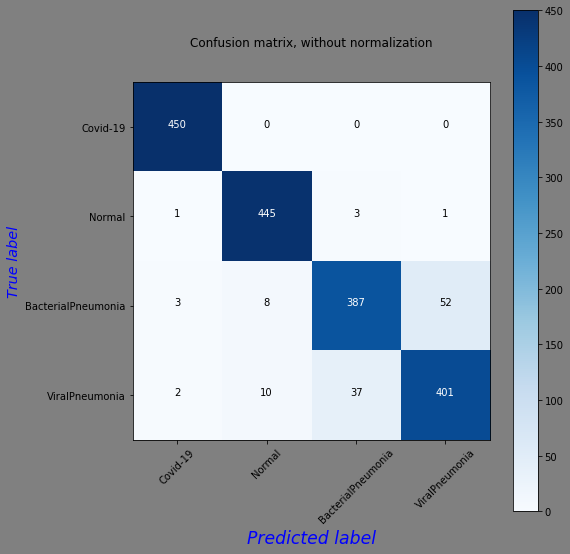

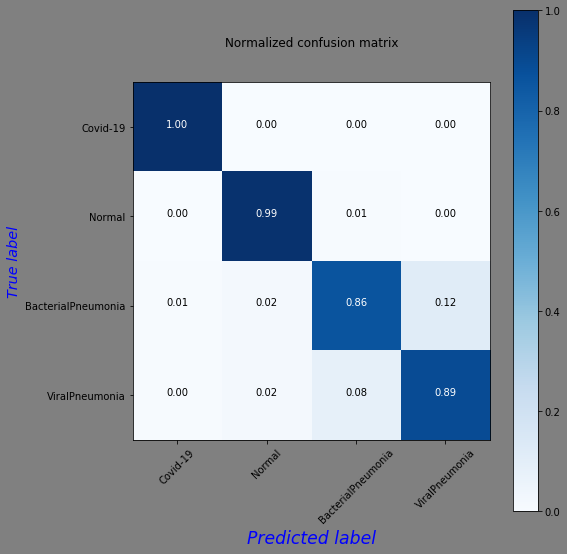

In [37]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('True label', fontstyle = 'italic', color='blue', fontsize = 'x-large')
    plt.xlabel('Predicted label', fontstyle = 'italic', color='blue', fontsize = 'xx-large')

cnf_matrix = confusion_matrix(Y_true, Y_pred)
np.set_printoptions(precision=2)

fig = plt.figure(figsize=(8,8))
fig.patch.set_facecolor('gray')
plot_confusion_matrix(cnf_matrix, classes = target, title='Confusion matrix, without normalization\n\n')

fig = plt.figure(figsize=(8,8))
fig.patch.set_facecolor('gray')
plot_confusion_matrix(cnf_matrix, classes = target, normalize = True, title = 'Normalized confusion matrix\n\n')

plt.show()

# ***Plot Accuracy :*** 

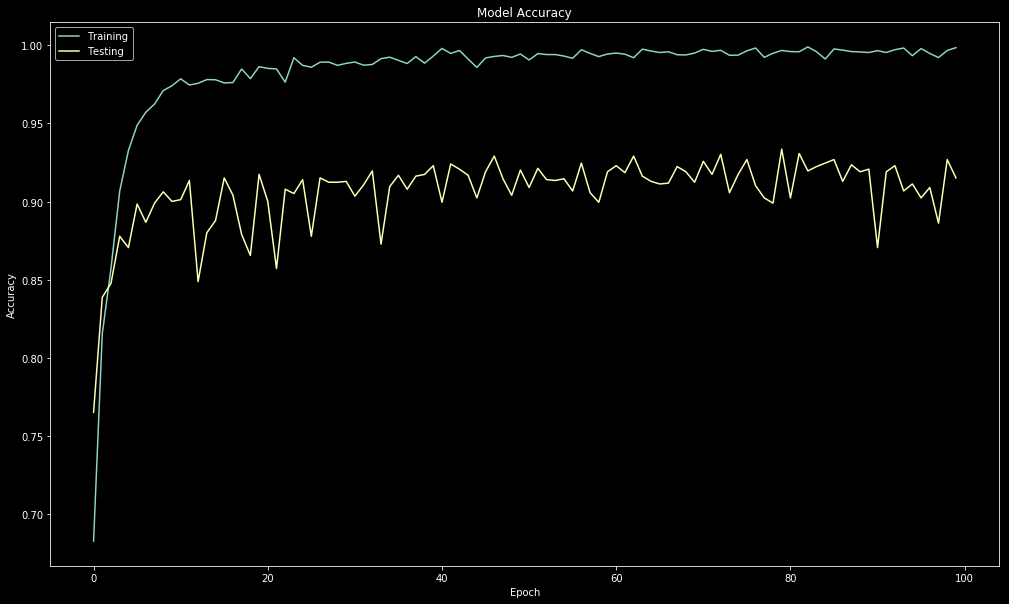

In [40]:
plt.figure(figsize=(17,10))
plt.style.use('dark_background')

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.legend(['Training', 'Testing'])

plt.show()

# ***Plot Loss :*** 

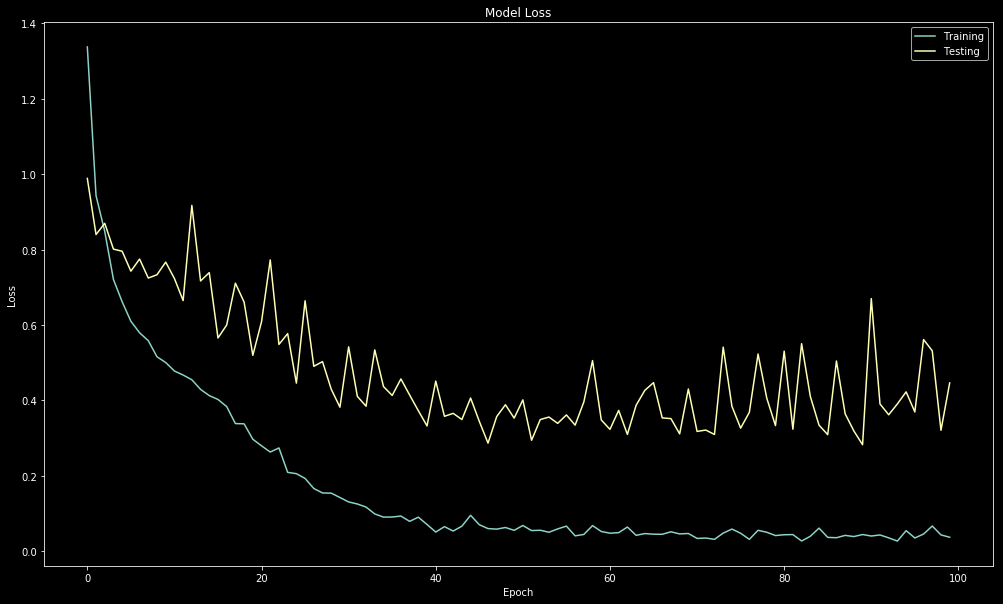

In [39]:
plt.figure(figsize=(17,10))
plt.style.use('dark_background')

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.legend(['Training', 'Testing'])

plt.show()